<a href="https://colab.research.google.com/github/Keshav1506/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cardiovascular Risk Prediction**
***
Before diving into the project, lets discuss what are Cardiovascular diseases and some of their major causes.

Cardiovascular diseases, also called CVDs, are the leading cause of death globally, causing an estimated 17.9 million deaths each year. 

***CVDs are a group of disorders of the heart and blood vessels and include coronary heart disease, cerebrovascular disease, rheumatic heart disease and other conditions.*** More than four out of five CVD deaths are due to heart attacks and strokes, and one third of these deaths occur prematurely in people under 70 years of age.

The most important behavioural risk factors of heart disease and stroke are **unhealthy diet, physical inactivity, tobacco use** and **harmful use of alcohol**. 

The effects of behavioural risk factors may show up in individuals as raised blood pressure, raised blood glucose, raised blood lipids, and overweight and obesity.

## **Objective** 
The main objective is to develop a model which can predict the risk of Cardiovascular disease for a person based on their health statistics and information about their tobacco usage.

## **Importing Neccessary Libraries**

Now in this section we'll import all the neccessary libraries and packages we'll require to develop the required model. Libraries like Pandas(and numpy), matplotlib(and seaborn) and sklearn are required for data manipulation, visualization and Machine Learning respectively. 

In [1]:
# Importing data visualization libraries.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing data manipulation libraries.
import pandas as pd
import numpy as np



## **Data Gathering and Discovery**

Now we'll import the data file and perform some basic operations to understand what type of data that we have and how we can process it to improve the model performance. We'll also check for null values and how we can deal with them.

In [2]:
# Mounting the Google Drive to access data.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# The variable Data_path contains the path of dataset stored in drive.
Data_path = "/content/drive/MyDrive/Colab Notebooks/Almabetter/Capstone Projects/Capstone Project 3 - Cardiovascular Risk Prediction/data/"


# Importing Cardiovascular risk Data File.
Risk_df = pd.read_csv(Data_path + "data_cardiovascular_risk.csv")

*Now lets see the first few rows to the dataset to understand the data and see what all attributes are present in the data file.*

In [ ]:
# First 5 rows of dataset.
Risk_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
Risk_df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [ ]:
Risk_df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
Risk_df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
Risk_df.describe(include = 'all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


In [ ]:
Risk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
# checking the total missing values in the dataset.
Risk_df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:

missing = Risk_df.columns[Risk_df.isnull().any()].tolist()

print('Missing Data Count')
print(Risk_df[missing].isnull().sum().sort_values(ascending = False))
print('--'*12)
print('Missing Data Percentage')
print(round(Risk_df[missing].isnull().sum().sort_values(ascending = False)/len(Risk_df)*100,2))

Missing Data Count
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
------------------------
Missing Data Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


In [ ]:
# dropping the missing value as we cannot fill with different technique as this datas are related to medical domain (which varies from person to person).
df = Risk_df.dropna(how = "any")
df.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
#duplicated() method returns a Series with True and False values that describe which rows in the DataFrame are duplicated and not.
df[df.duplicated()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [ ]:
#dropping the column id.
df.drop(columns=['id'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
#checking the total people who are at risk with the CHD.
df["TenYearCHD"].value_counts()

0    2483
1     444
Name: TenYearCHD, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


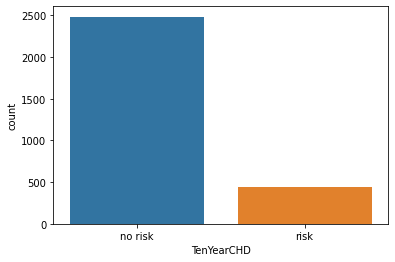

In [ ]:
g = sns.countplot(df['TenYearCHD'])
g.set_xticklabels(['no risk','risk'])
plt.show()

Here we can see that the class is imbalance 
so to make it as a balance class we will deal with different sampling techniques.

In [ ]:
#cpunting numbers of males and females.
df["sex"].value_counts()

F    1620
M    1307
Name: sex, dtype: int64

In [ ]:
#counting the number of smokers.
Risk_df["is_smoking"].value_counts()

NO     1703
YES    1687
Name: is_smoking, dtype: int64

In [ ]:
df["diabetes"].value_counts()

0    2848
1      79
Name: diabetes, dtype: int64

In [ ]:
df['sex'] = df['sex'].map(
                   {'M':1 ,'F': 0})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df['is_smoking'] = df['is_smoking'].map(
                   {'YES':1 ,'NO': 0})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

## EDA

In [ ]:
#differentiating the numerical and categorical features
categorical_features = [i for i in df.columns if df[i].nunique()<=4]
numeric_features = [i for i in df.columns if i not in categorical_features]

print(categorical_features)
print(numeric_features)

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

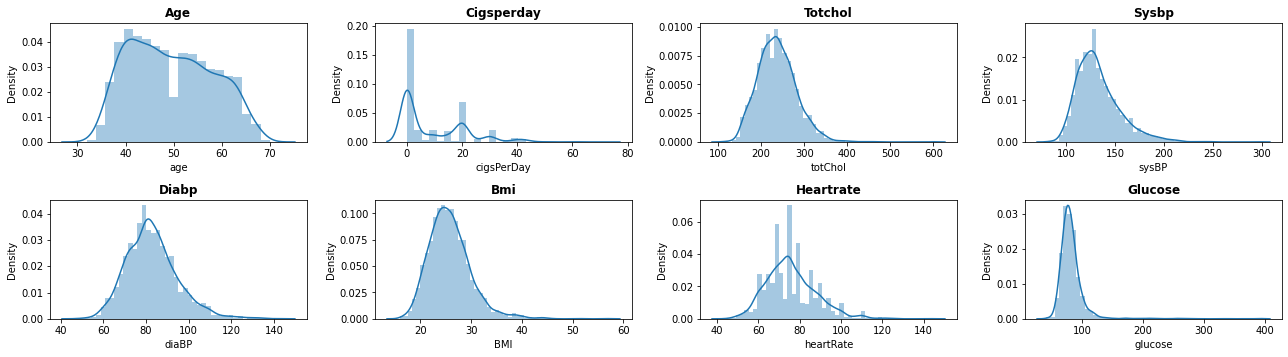

In [ ]:
# Visualizing the distributions.
plt.figure(figsize=(18,12))
for i, column in enumerate(numeric_features):
  plt.subplot(5, 4, i+1)
  sns.distplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


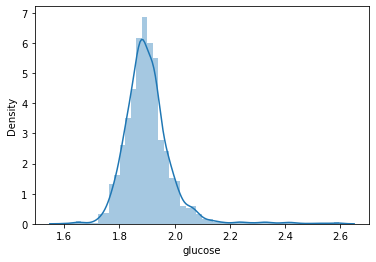

In [ ]:
sns.distplot(np.log10(df['glucose']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

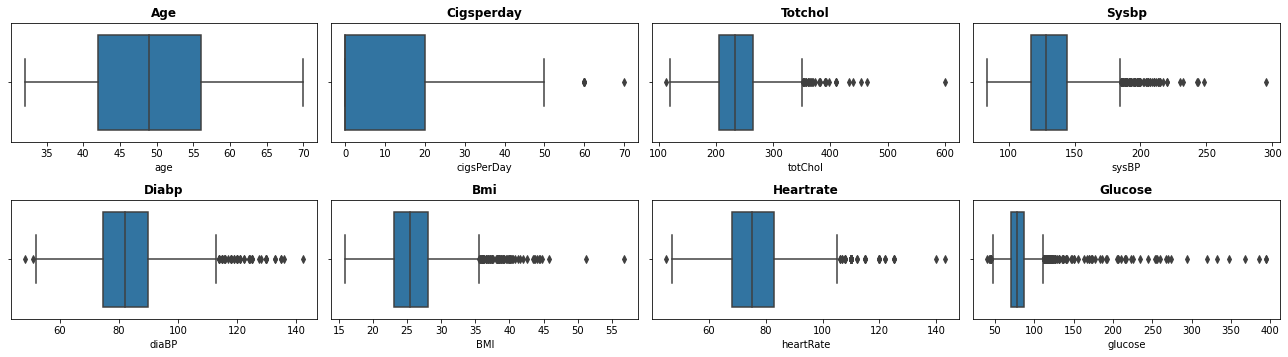

In [ ]:
plt.figure(figsize=(18,12))
for i,column in enumerate(numeric_features):
  plt.subplot(5, 4, i+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

**UNIVARIATE ANALYSIS**

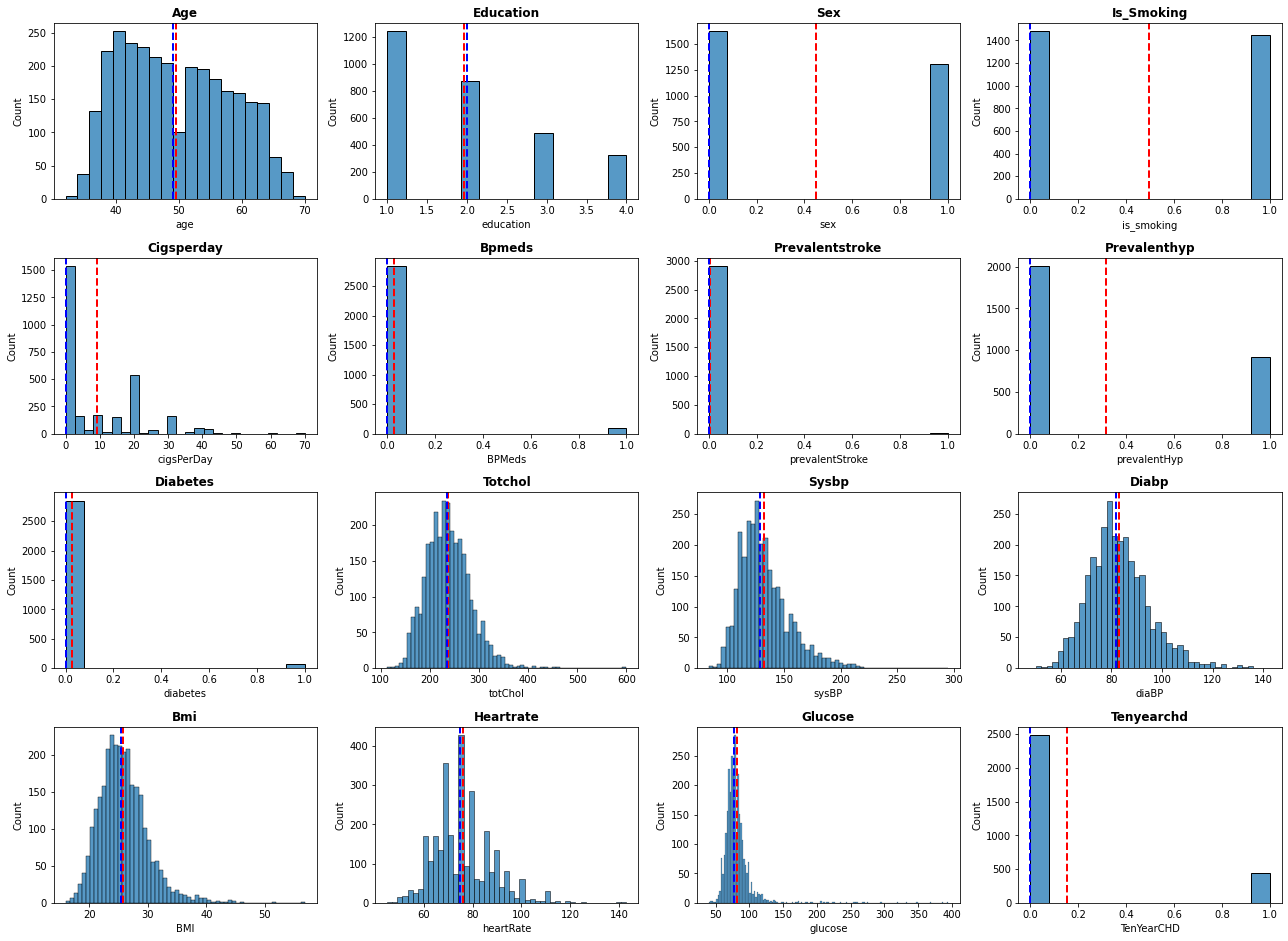

In [ ]:
# Visualizing the mean and median.
plt.figure(figsize=(18,16))
for i, column in enumerate(df.columns):
  feature = df[column]
  ax=plt.subplot(5, 4, i+1)
  sns.histplot(feature)
  ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

**BIVARIATE ANALYSIS**

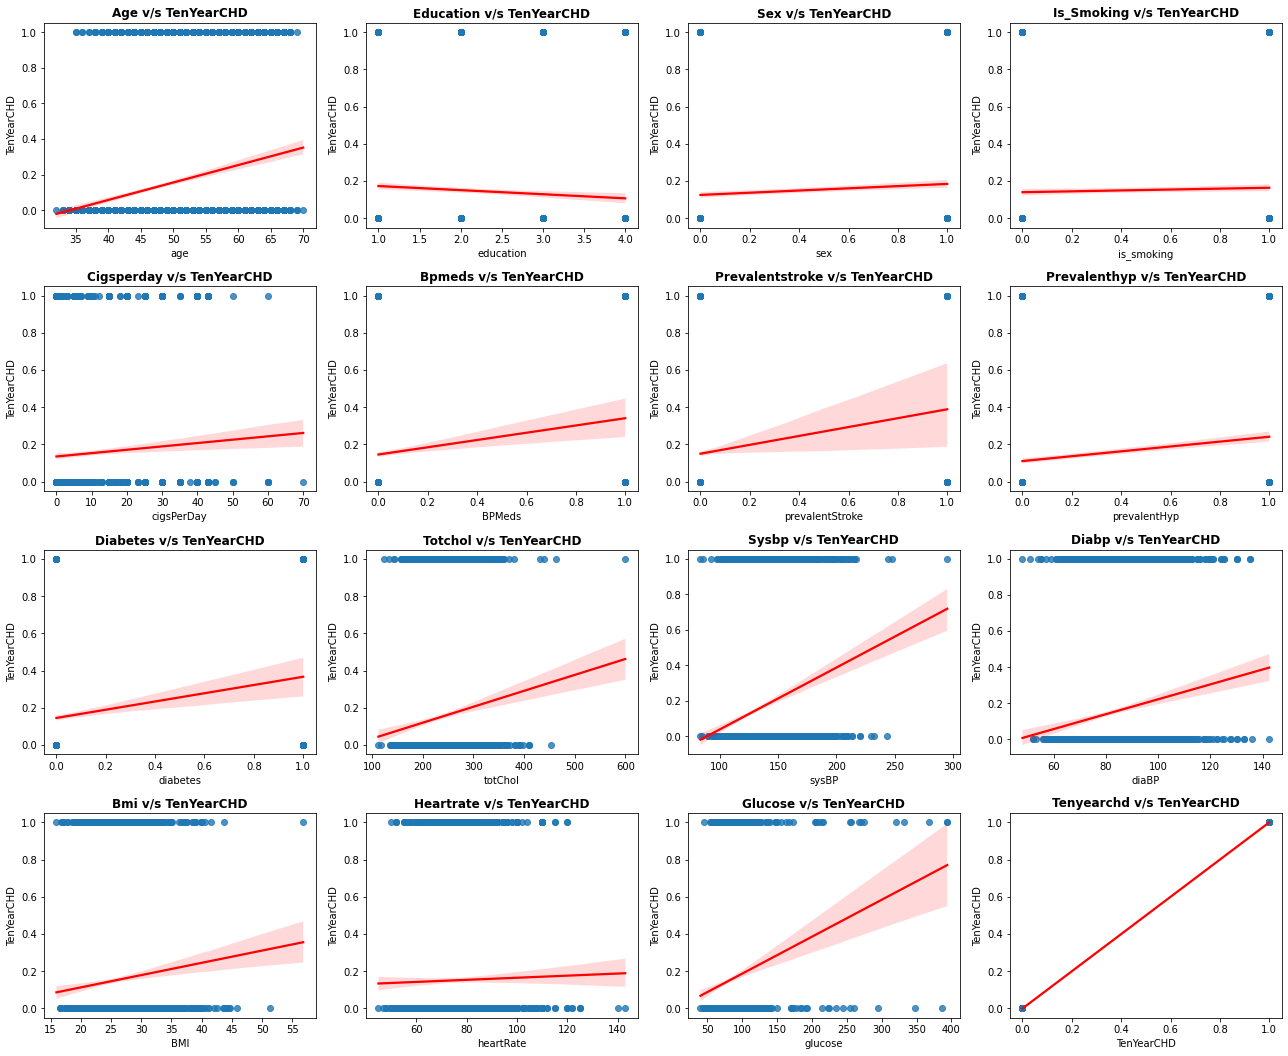

In [ ]:
# Checking Linearity
independent_variables = [i for i in df.columns if i not in ['id', 'TenYearCHD']]

plt.figure(figsize=(18,18))
for n, column in enumerate(df.columns ):
  plt.subplot(5, 4, n+1)
  sns.regplot(x = df[column], y =df['TenYearCHD'],line_kws={"color": "red"})
  plt.title(f'{column.title()} v/s TenYearCHD',weight='bold')
  plt.tight_layout()

**MULTIVARIATE ANALYSIS**

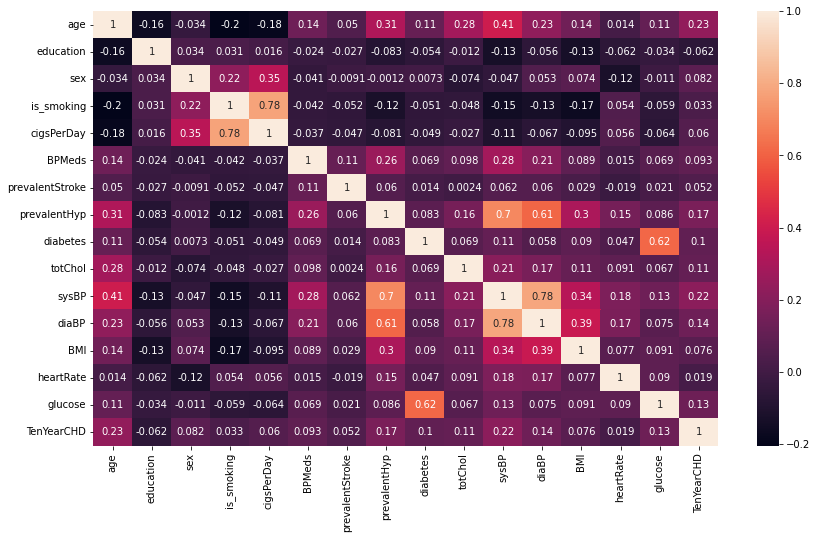

In [ ]:
correlmap = df.corr()
f, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(correlmap, annot=True, ax = ax)

## Model Building

### Prerequisites

In [ ]:
X = df.drop('TenYearCHD',axis=1).values
y = df['TenYearCHD'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0, stratify=y)

In [ ]:
pd.DataFrame(y_train).value_counts()

0    1986
1     355
dtype: int64

In [ ]:
pd.DataFrame(y_test).value_counts()

0    497
1     89
dtype: int64

In [ ]:
# from sklearn.preprocessing import MinMaxScaler


In [ ]:
# scaler_range = MinMaxScaler()
# scaler_range.fit(X_train)

MinMaxScaler()

In [ ]:
# df_train_scaled = pd.DataFrame(scaler_range.transform(X_train))
# df_test_scaled = pd.DataFrame(scaler_range.transform(X_test))

In [ ]:
from imblearn.combine import SMOTETomek
X_smote, y_smote = SMOTETomek(random_state=42).fit_resample(X_train, y_train)

In [ ]:
#dataframe to contain results
res_df=pd.DataFrame()

## K-Nearest Neighbour (KNN)

In [ ]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,10)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_smote, y_smote)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_smote, y_smote)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

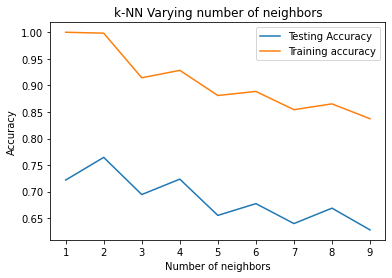

In [ ]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=2)

In [ ]:
# Fit the model
knn.fit(X_smote,y_smote)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix,roc_curve

In [ ]:
# Let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[422,  75],
       [ 63,  26]])

In [ ]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

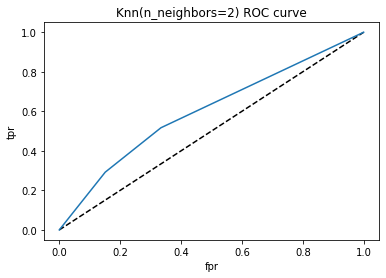

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=2) ROC curve')
plt.show()

In [ ]:
# Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.6012140257273981

In [ ]:
# Finding precision and recall
from sklearn.metrics import precision_score, recall_score
recall_score(y_test, y_pred)

0.29213483146067415

In [ ]:
precision_score(y_test, y_pred)


0.25742574257425743

In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
# In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

In [ ]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_smote,y_smote)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
knn_cv.best_score_

0.8852983112990678

In [ ]:
knn_cv.best_params_

{'n_neighbors': 2}

In [ ]:
from sklearn.metrics import classification_report 
#adding results to results df
dict1= classification_report(y_test,y_pred,output_dict=True)
tempodf=pd.DataFrame(dict1).transpose()
tempodf['Model'] = 'K Nearest Neighbours Classifier'

res_df=res_df.append(tempodf)

In [ ]:
classification_report(y_test, y_pred)
            

'              precision    recall  f1-score   support\n\n           0       0.87      0.85      0.86       497\n           1       0.26      0.29      0.27        89\n\n    accuracy                           0.76       586\n   macro avg       0.56      0.57      0.57       586\nweighted avg       0.78      0.76      0.77       586\n'

In [ ]:
res_df

,precision,recall,f1-score,support,Model
0,0.870103,0.849095,0.859470,497.000000,K Nearest Neighbours Classifier
1,0.257426,0.292135,0.273684,89.000000,K Nearest Neighbours Classifier
accuracy,0.764505,0.764505,0.764505,0.764505,K Nearest Neighbours Classifier
macro avg,0.563764,0.570615,0.566577,586.000000,K Nearest Neighbours Classifier
weighted avg,0.777051,0.764505,0.770503,586.000000,K Nearest Neighbours Classifier


## Naive Bayes Classifier.

In [ ]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_smote, y_smote)
 
# making predictions on the testing set
y_test_pred = gnb.predict(X_test)
y_train_pred = gnb.predict(X_smote)



In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train_pred,y_smote))
print(accuracy_score(y_test_pred,y_test))

0.5984231943031536
0.8191126279863481


In [ ]:
confusion_matrix(y_smote,y_train_pred)

array([[1911,   55],
       [ 353, 1613]])

In [ ]:
confusion_matrix(y_test,y_test_pred)

array([[443,  54],
       [ 52,  37]])

In [ ]:
y_pred_proba = gnb.predict_proba(X_test)[:,1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

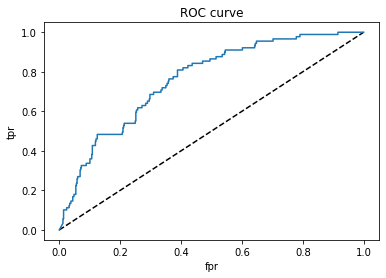

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [ ]:
# Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7606990256143603

In [ ]:
from collections import Counter

In [ ]:
Counter(y_test)

Counter({0: 497, 1: 89})

In [ ]:

#adding results to results df
dict1= classification_report(y_test,y_test_pred,output_dict=True)
tempodf=pd.DataFrame(dict1).transpose()
tempodf['Model'] = 'Gaussian Naive Bayes Classifier'

res_df=res_df.append(tempodf)

In [ ]:
res_df

,precision,recall,f1-score,support,Model
0,0.870103,0.849095,0.859470,497.000000,K Nearest Neighbours Classifier
1,0.257426,0.292135,0.273684,89.000000,K Nearest Neighbours Classifier
accuracy,0.764505,0.764505,0.764505,0.764505,K Nearest Neighbours Classifier
macro avg,0.563764,0.570615,0.566577,586.000000,K Nearest Neighbours Classifier
weighted avg,0.777051,0.764505,0.770503,586.000000,K Nearest Neighbours Classifier
0,0.894949,0.891348,0.893145,497.000000,Gaussian Naive Bayes Classifier
1,0.406593,0.415730,0.411111,89.000000,Gaussian Naive Bayes Classifier
accuracy,0.819113,0.819113,0.819113,0.819113,Gaussian Naive Bayes Classifier
macro avg,0.650771,0.653539,0.652128,586.000000,Gaussian Naive Bayes Classifier
weighted avg,0.820779,0.819113,0.819935,586.000000,Gaussian Naive Bayes Classifier


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_smote, y_smote)

LogisticRegression(max_iter=10000)

In [ ]:
# Get the predicted probabilities
train_preds = clf.predict_proba(X_smote)
test_preds = clf.predict_proba(X_test)

In [ ]:
# Get the predicted classes
train_class_preds = clf.predict(X_smote)
test_class_preds = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_smote)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6785350966429298
The accuracy on test data is  0.6569965870307167


In [ ]:
confusion_matrix(y_test,test_class_preds)

array([[323, 174],
       [ 27,  62]])

In [ ]:
#adding results to results df
dict1= classification_report(y_test,y_pred,output_dict=True)
tempodf=pd.DataFrame(dict1).transpose()
tempodf['Model'] = 'Logistic Classifier'

res_df=res_df.append(tempodf)

In [ ]:
res_df

,precision,recall,f1-score,support,Model
0,0.870103,0.849095,0.859470,497.000000,K Nearest Neighbours Classifier
1,0.257426,0.292135,0.273684,89.000000,K Nearest Neighbours Classifier
accuracy,0.764505,0.764505,0.764505,0.764505,K Nearest Neighbours Classifier
macro avg,0.563764,0.570615,0.566577,586.000000,K Nearest Neighbours Classifier
weighted avg,0.777051,0.764505,0.770503,586.000000,K Nearest Neighbours Classifier
0,0.894949,0.891348,0.893145,497.000000,Gaussian Naive Bayes Classifier
1,0.406593,0.415730,0.411111,89.000000,Gaussian Naive Bayes Classifier
accuracy,0.819113,0.819113,0.819113,0.819113,Gaussian Naive Bayes Classifier
macro avg,0.650771,0.653539,0.652128,586.000000,Gaussian Naive Bayes Classifier
weighted avg,0.820779,0.819113,0.819935,586.000000,Gaussian Naive Bayes Classifier


## Support Vector Machine

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
svmc = svm.SVC(kernel='poly') # Polynomial Kernel

#Train the model using the training sets
svmc.fit(X_smote, y_smote)

#Predict the response for test dataset
y_pred = svmc.predict(X_smote)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
svmc.score(X_test,y_test)


0.6808873720136519

In [ ]:
res_df

,precision,recall,f1-score,support,Model
0,0.870103,0.849095,0.859470,497.000000,K Nearest Neighbours Classifier
1,0.257426,0.292135,0.273684,89.000000,K Nearest Neighbours Classifier
accuracy,0.764505,0.764505,0.764505,0.764505,K Nearest Neighbours Classifier
macro avg,0.563764,0.570615,0.566577,586.000000,K Nearest Neighbours Classifier
weighted avg,0.777051,0.764505,0.770503,586.000000,K Nearest Neighbours Classifier
0,0.894949,0.891348,0.893145,497.000000,Gaussian Naive Bayes Classifier
1,0.406593,0.415730,0.411111,89.000000,Gaussian Naive Bayes Classifier
accuracy,0.819113,0.819113,0.819113,0.819113,Gaussian Naive Bayes Classifier
macro avg,0.650771,0.653539,0.652128,586.000000,Gaussian Naive Bayes Classifier
weighted avg,0.820779,0.819113,0.819935,586.000000,Gaussian Naive Bayes Classifier


## XGB Classifier

In [ ]:
import xgboost as xgb

In [ ]:
model = xgb.XGBClassifier()
model.fit(X_smote, y_smote)
print(); print(model)


XGBClassifier()


In [ ]:
# making predictions on the testing set
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_smote)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train_pred,y_smote))
print(accuracy_score(y_test_pred,y_test))

0.896236012207528
0.8310580204778157


In [ ]:
confusion_matrix(y_test,y_test_pred)

array([[474,  23],
       [ 76,  13]])

## Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(200):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_smote,y_smote)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
# rf = RandomForestClassifier()

rf.fit(X_smote,y_smote)
Y_pred_rf = rf.predict(X_test)

In [ ]:
score_rf = round(accuracy_score(Y_pred_rf,y_test)*100,2)

print("The accuracy score for test dat achieved using Random forest is: " + str(score_rf)+" %")

The accuracy score for test dat achieved using Random forest is: 84.3 %


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,Y_pred_rf)

array([[482,  15],
       [ 77,  12]])

In [ ]:
y_pred_train_rf = rf.predict(X_smote)

In [ ]:
score_rf = round(accuracy_score(y_pred_train_rf, y_smote)*100,2)

print("The accuracy score for trained data achieved using random forest is: " + str(score_rf)+" %")

The accuracy score for trained data achieved using random forest is: 100.0 %


## Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_smote,y_smote)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_smote,y_smote)
Y_pred_dt = dt.predict(X_test)

In [ ]:
score_dt = round(accuracy_score(Y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 74.4 %


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['TenYearCHD'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 2927
Resampled dataset shape 4966


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 3)

In [ ]:
from tensorflow import keras

def get_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=[X_train.shape[-1]]),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(9, activation='softmax')
    ])
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
import tensorflow as tf

batch_size = 512
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(len(x_train)).batch(batch_size)
val_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

model = get_model()
fit = model.fit(train_ds, validation_data=val_ds, epochs=20)

Epoch 1/20
8/8 [==============================] - 1s 42ms/step - loss: 4.8056 - accuracy: 0.3406 - val_loss: 1.2440 - val_accuracy: 0.5050
Epoch 2/20
8/8 [==============================] - 0s 23ms/step - loss: 1.7496 - accuracy: 0.4504 - val_loss: 0.9064 - val_accuracy: 0.5342
Epoch 3/20
8/8 [==============================] - 0s 22ms/step - loss: 1.2056 - accuracy: 0.4685 - val_loss: 0.7517 - val_accuracy: 0.5483
Epoch 4/20
8/8 [==============================] - 0s 20ms/step - loss: 1.1090 - accuracy: 0.4665 - val_loss: 0.7220 - val_accuracy: 0.5654
Epoch 5/20
8/8 [==============================] - 0s 23ms/step - loss: 1.0448 - accuracy: 0.4806 - val_loss: 0.7302 - val_accuracy: 0.5734
Epoch 6/20
8/8 [==============================] - 0s 21ms/step - loss: 0.9894 - accuracy: 0.5035 - val_loss: 0.7018 - val_accuracy: 0.5976
Epoch 7/20
8/8 [==============================] - 0s 22ms/step - loss: 0.9576 - accuracy: 0.5086 - val_loss: 0.6765 - val_accuracy: 0.6167
Epoch 8/20
8/8 [===========

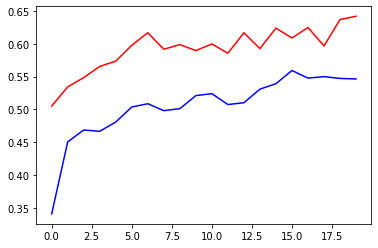

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fit.history['accuracy'], color='blue')
plt.plot(fit.history['val_accuracy'], color='red')
plt.show()